## MNIST machine learning exercise

In this exercise we will compare the performance of three different modeling approaches at predicting handwritten numbers. 

We use the MNIST data set;

![mnist data](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

## Load libraries

In [2]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
from __future__ import print_function
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

from sklearn import datasets


np.random.seed(1)

## Load data and explore/get to know the data structure



Load the MNIST digits dataset. It's originally from UCI machine learning library, but included in SKLearn.

In [4]:
mnist = datasets.load_digits() # sklearn includes this data set .. https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Notice that the dataset is stored in a dictionary

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Note thjat there are 1797 images.

In [6]:
print(len(mnist.data))

1797


Images are 8x8 grid of values epresenting the gray level for each pixel (16 levels of grey -- from 0 (black) to 15 (white)). 

In [7]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

To analyze this, we simple turn this into a one dimensional array (so we will x1, x2, ... x63, x64). This has already been done for us, and is stored in the data key.

In [8]:
mnist.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
print(mnist.target[0])
print(mnist.target[1])
print(mnist.target[2])
print(mnist.target[3])
print(mnist.target[4])
print(mnist.target[5])
print(mnist.target[6])

0
1
2
3
4
5
6


We can use matplotlib to display a sample of these images from the data.

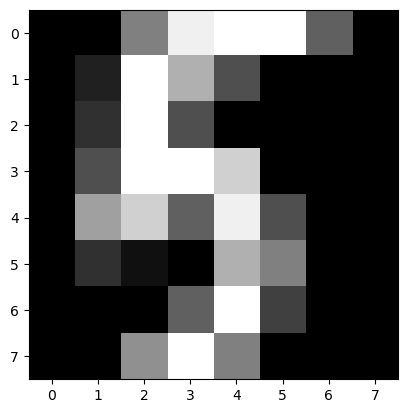

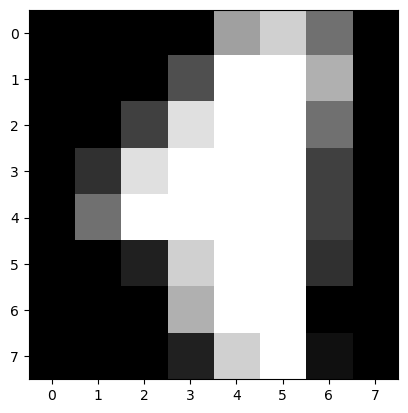

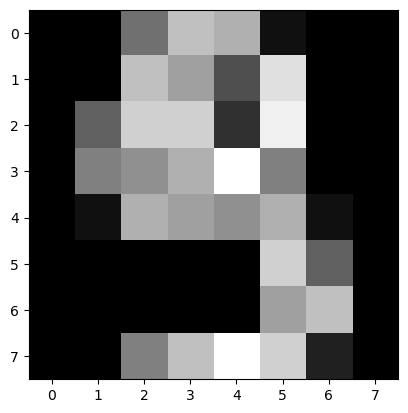

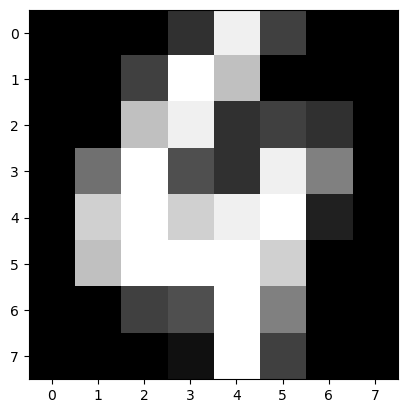

In [10]:
for i in np.random.choice(range(0,len(mnist.images)), 4): # choose 4 at random
  plt.imshow(mnist.images[i], cmap='gray')
  plt.show()

## Split data into training and test sets


In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=1)

# Using Keras

## Deep Network

In [12]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(1)
tf.random.set_seed(1)

In [13]:
%%time

# create model stucture
model = keras.models.Sequential()
model.add(keras.layers.Input(64))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # final layer, 10 categories


# compile
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# if you want to overide the defaults for the optimizer....
#adam = keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


Wall time: 83.5 ms


In [14]:
%%time

# fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)


Epoch 1/20
15/15 [==============================] - 1s 15ms/step - loss: 3.9450 - accuracy: 0.1496 - val_loss: 2.0888 - val_accuracy: 0.3111
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 1.5619 - accuracy: 0.4572 - val_loss: 1.1840 - val_accuracy: 0.6556
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.9145 - accuracy: 0.7321 - val_loss: 0.7902 - val_accuracy: 0.7861
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.8441 - val_loss: 0.5670 - val_accuracy: 0.8361
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.3818 - accuracy: 0.8845 - val_loss: 0.4171 - val_accuracy: 0.8778
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2783 - accuracy: 0.9235 - val_loss: 0.3424 - val_accuracy: 0.8972
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2123 - accuracy: 0.9429 - val_loss: 0.2998 - val_accuracy: 0.9083
Epoch 8/20
15/15 [=

In [15]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores
# In results, first is loss, second is accuracy

[0.11710008233785629, 0.9583333134651184]

In [16]:
# let's format this into a better output...

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.12
accuracy: 95.83%


## Wide and Deep Network

In [17]:
#Define the model: for multi-class

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=64))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [19]:
# Fit the model

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, batch_size=100)

Epoch 1/20
15/15 [==============================] - 1s 10ms/step - loss: 1.5639 - accuracy: 0.5908 - val_loss: 0.4337 - val_accuracy: 0.8389
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.9130 - val_loss: 0.2703 - val_accuracy: 0.9167
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.9492 - val_loss: 0.1847 - val_accuracy: 0.9500
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9708 - val_loss: 0.1425 - val_accuracy: 0.9556
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.1612 - val_accuracy: 0.9472
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9840 - val_loss: 0.1342 - val_accuracy: 0.9694
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9826 - val_loss: 0.1185 - val_accuracy: 0.9611
Epoch 8/20
15/15 [=

In [20]:
# evaluate the model

scores = model.evaluate(X_test, y_test, verbose=0)
scores

# In results, first is loss, second is accuracy

[0.20561735332012177, 0.949999988079071]

In [21]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 0.21
accuracy: 95.00%


## RandomGridSearch - uniform

In [37]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotUniform(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


Wall time: 0 ns


For more information on dense layers and initializers, see the following:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/initializers/

In [38]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout = 0.0
)


In [39]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [40]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


5/5 [==============================] - 0s 1ms/step


In [41]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.001,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100, 90),
 'model__dropout': 0,
 'epochs': 100,
 'batch_size': 20}

In [42]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.001, 'optimizer': 'adam', 'model__hidden_layer_sizes': (100, 90), 'model__dropout': 0, 'epochs': 100, 'batch_size': 20}


In [43]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

18/18 [==============================] - 0s 612us/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.94      0.96        35
           2       1.00      1.00      1.00        36
           3       0.98      0.98      0.98        41
           4       0.90      1.00      0.95        38
           5       0.93      0.93      0.93        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       0.97      0.97      0.97        29
           9       0.94      0.97      0.96        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Wall time: 74.6 ms


In [44]:
%%time

# If you don't have the following installed, from command line '!pip install scikeras'
from scikeras.wrappers import KerasClassifier
from keras.initializers import GlorotNormal

score_measure = "accuracy"
kfolds = 5

def build_clf(hidden_layer_sizes, dropout):
    ann = tf.keras.models.Sequential()
    ann.add(keras.layers.Input(shape=64)),
    for hidden_layer_size in hidden_layer_sizes:
        model.add(keras.layers.Dense(hidden_layer_size, kernel_initializer= tf.keras.initializers.GlorotNormal(), 
                                     bias_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None), activation="relu"))
        model.add(keras.layers.Dropout(dropout))
    ann.add(tf.keras.layers.Dense(10, activation='softmax'))
    ann.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return ann


Wall time: 0 ns


For more information on dense layers and initializers, see the following:
* https://keras.io/api/layers/core_layers/dense/
* https://keras.io/api/layers/initializers/

In [45]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model=build_clf,
    hidden_layer_sizes=64,
    dropout = 0.0
)


In [47]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

params = {
    'optimizer__learning_rate': [0.0005, 0.001, 0.005],
    'model__hidden_layer_sizes': [(70,),(90, ), (100,), (100, 90)],
    'model__dropout': [0, 0.1],
    'batch_size':[20, 60, 100],
    'epochs':[10, 50, 100],
    'optimizer':["adam",'sgd']
}
keras_clf.get_params().keys()



dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layer_sizes', 'dropout', 'class_weight'])

In [48]:
rnd_search_cv = RandomizedSearchCV(estimator=keras_clf, param_distributions=params, scoring='accuracy', n_iter=50, cv=5)

import sys
sys.setrecursionlimit(10000) # note: the default is 3000 (python 3.9)

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
callback = [earlystop]

_ = rnd_search_cv.fit(X_train, y_train, callbacks=callback, verbose=0)


3/3 [==============================] - 0s 1ms/step


In [49]:
rnd_search_cv.best_params_

{'optimizer__learning_rate': 0.0005,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100, 90),
 'model__dropout': 0,
 'epochs': 100,
 'batch_size': 20}

In [50]:
best_net = rnd_search_cv.best_estimator_
print(rnd_search_cv.best_params_)

{'optimizer__learning_rate': 0.0005, 'optimizer': 'adam', 'model__hidden_layer_sizes': (100, 90), 'model__dropout': 0, 'epochs': 100, 'batch_size': 20}


In [51]:
%%time
y_pred = best_net.predict(X_test)
print(classification_report(y_test, y_pred))

18/18 [==============================] - 0s 627us/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.94      0.96        35
           2       0.97      1.00      0.99        36
           3       0.97      0.95      0.96        41
           4       0.90      1.00      0.95        38
           5       0.88      0.93      0.90        30
           6       1.00      1.00      1.00        37
           7       1.00      0.92      0.96        37
           8       0.93      0.93      0.93        29
           9       0.97      0.94      0.96        34

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

Wall time: 75.6 ms


Here from the above results the accuracy for GlorotNormal is 0.96 which is less than the GlorotUniform of 0.97. So the uniform Distribution of weights right from intialization has lead to better performing model than normal distribution.